In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
clf = DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.86666667, 0.86666667, 1.        ])

In [2]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 11
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="uniform")
knn = knn.fit(iris.data, iris.target)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
scores

array([0.93333333, 1.        , 1.        , 0.96666667, 1.        ])

In [3]:
# Model perdictions
for i in range(len(iris.target)):
    instance = (iris.data[i,:]).reshape(1,-1)
    predicted = knn.predict(instance)[0]
    if iris.target[i] == predicted:
        print(f"{i} ok {iris.target_names[iris.target[i]]}")
    else:
        print(f"{i} nope True class: {iris.target_names[iris.target[i]]}; Predicted: {iris.target_names[predicted]}")


0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

In [4]:
n_neighbors = 11
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
knn = knn.fit(iris.data, iris.target)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 1.        , 0.96666667, 1.        ])

In [5]:
# Model perdictions
for i in range(len(iris.target)):
    instance = (iris.data[i,:]).reshape(1,-1)
    predicted = knn.predict(instance)[0]
    if iris.target[i] == predicted:
        print(f"{i} ok {iris.target_names[iris.target[i]]}")
    else:
        print(f"{i} nope True class: {iris.target_names[iris.target[i]]}; Predicted: {iris.target_names[predicted]}")

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
best_accuracy = 0
best_k = 1
A = np.zeros(len(y_train), dtype=np.float) #storing accuracies
for n_neighbors in np.arange(1, len(y_train)+1):
    knn3 = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
    # (n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=1, **kwargs)
    knn3.fit(X_train, y_train)
    index = n_neighbors - 1
    A[index] = knn3.score(X_test, y_test)
    if best_accuracy < knn3.score(X_test, y_test):
        best_accuracy = knn3.score(X_test, y_test)
        best_k = n_neighbors
    print(f"K Neighbors= {n_neighbors}")
    print(f"Accuracy= {knn3.score(X_test, y_test)}")
print("\n")
print(f"Best k: {best_k}")
print(f"Accuracy: {best_accuracy}")


C:\Users\DRUNKF~1\AppData\Local\Temp/ipykernel_3724/2186624967.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.zeros(len(y_train), dtype=np.float) #storing accuracies


K Neighbors= 1
Accuracy= 0.9166666666666666
K Neighbors= 2
Accuracy= 0.9166666666666666
K Neighbors= 3
Accuracy= 0.9333333333333333
K Neighbors= 4
Accuracy= 0.9166666666666666
K Neighbors= 5
Accuracy= 0.95
K Neighbors= 6
Accuracy= 0.9333333333333333
K Neighbors= 7
Accuracy= 0.9666666666666667
K Neighbors= 8
Accuracy= 0.9333333333333333
K Neighbors= 9
Accuracy= 0.9666666666666667
K Neighbors= 10
Accuracy= 0.9666666666666667
K Neighbors= 11
Accuracy= 0.9666666666666667
K Neighbors= 12
Accuracy= 0.9666666666666667
K Neighbors= 13
Accuracy= 0.9666666666666667
K Neighbors= 14
Accuracy= 0.95
K Neighbors= 15
Accuracy= 0.95
K Neighbors= 16
Accuracy= 0.9166666666666666
K Neighbors= 17
Accuracy= 0.9333333333333333
K Neighbors= 18
Accuracy= 0.9166666666666666
K Neighbors= 19
Accuracy= 0.9166666666666666
K Neighbors= 20
Accuracy= 0.9166666666666666
K Neighbors= 21
Accuracy= 0.9166666666666666
K Neighbors= 22
Accuracy= 0.9166666666666666
K Neighbors= 23
Accuracy= 0.9166666666666666
K Neighbors= 24


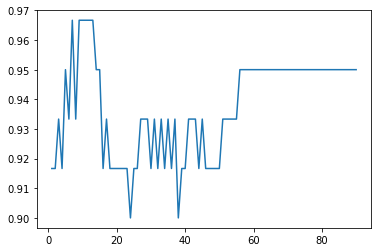

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tiker

# plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0, 1.0, 0.01))

plt.plot(np.arange(1, len(y_train)+1), A)
plt.show()